# Tasks

1) Plot basic Decision Tree. Show the ROC Curve for different depths <BR>
2) Use out of sample cross validation and show the ROC curve for each.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import graphviz

In [2]:
df = pd.read_csv ('chapter_1_cleaned_data.csv')

Get a list of the column names

In [3]:
features_response = df.columns.tolist ()
features_response

['Unnamed: 0',
 'ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_2',
 'grad school',
 'high school',
 'other',
 'uni']

In [4]:
lst_items_to_remove = [features_response[0]] +['ID', 'SEX','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION_2', 'grad school', 'high school', 'other', 'uni']
lst_items_to_remove

['Unnamed: 0',
 'ID',
 'SEX',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'EDUCATION_2',
 'grad school',
 'high school',
 'other',
 'uni']

In [5]:
features_response = [item for item in features_response if item not in lst_items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = train_test_split ( df[features_response[:-1]]  , df['default payment next month'] , test_size = 0.2, random_state = 24)

In [8]:
print (X_train.shape, y_train.shape)

(21331, 17) (21331,)


In [9]:
dt = tree.DecisionTreeClassifier ( max_depth = 2)

In [10]:
dt.fit ( X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
dot_data = tree.export_graphviz ( dt, proportion=True, 
                                 feature_names = features_response[:-1], 
                                 class_names=['Not Default','Default'],
                                rounded=True)

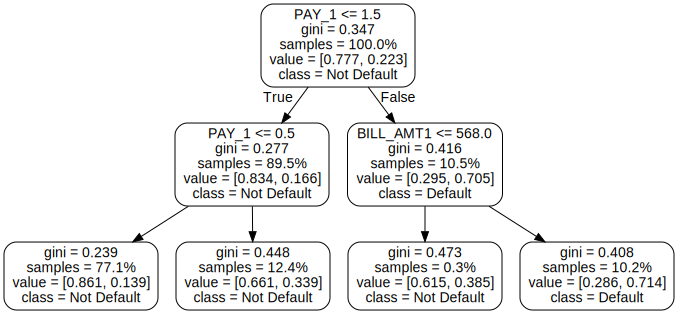

In [12]:
graph = graphviz.Source (dot_data)
graph

Text(0, 0.5, 'TPR')

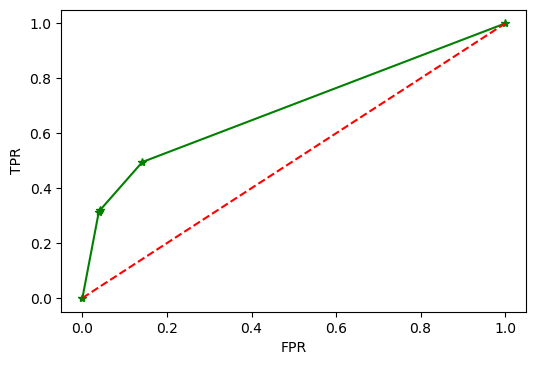

In [13]:

from sklearn.metrics import roc_curve

predict_proba =  dt.predict_proba (X_test ) 
fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])

plt.plot (fpr, tpr, 'g*-')
plt.plot ( [0,1], [0,1], 'r--')

#plt.hist ( predict_proba[:,1])


plt.xlabel ('FPR')
plt.ylabel ('TPR')


#### Plot the ROC curve with different tree depths 

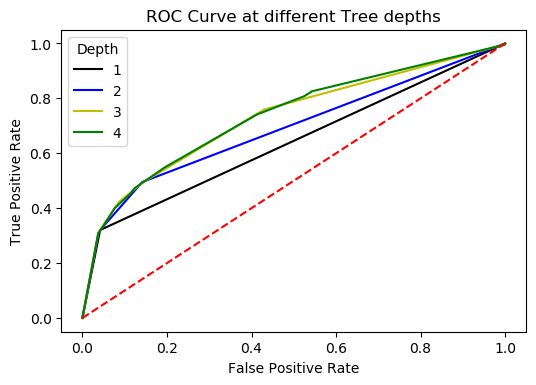

In [14]:
cmap = { 1:'k',2:'b',3:'y',4:'g',5:'pink' }

#axes = plt.axes()

for this_depth in [i+1 for i in range (4)]:
    dt = tree.DecisionTreeClassifier ( max_depth = this_depth)
    dt.fit ( X_train, y_train)
    predict_proba =  dt.predict_proba (X_test ) 
    fpr, tpr, thresholds = roc_obj = roc_curve (y_test, predict_proba[:,1])
    #aStr = 'depth {0}'.format ( cmap[this_depth] )  
    plt.plot (fpr, tpr,  cmap[this_depth], label = this_depth )
    #axes.legend ( cmap.keys() )

plt.plot ( [0,1], [0,1], 'r--')

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ( 'ROC Curve at different Tree depths')    
plt.legend(title="Depth")


#### Build ROC Curves for several cross validation folds 

This is just an idea that I had - it is not best practice

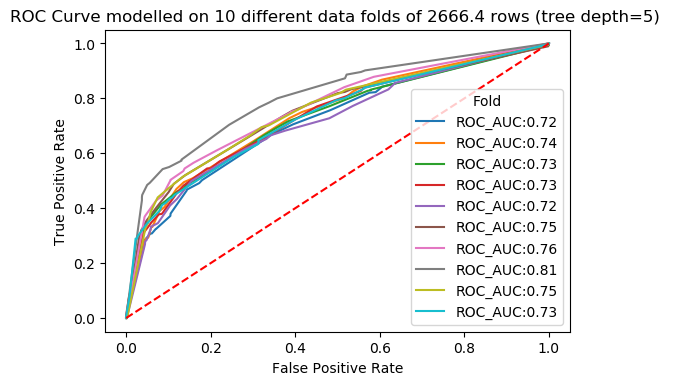

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics         import roc_auc_score

#C_vals = [0.00005, 0.0005,0.005,0.05,0.5,1,1.5,2]
#C_vals = [0.05,0.5,1,1.5,2]

k_folds = KFold ( n_splits = 10, shuffle=False, random_state = None)

X_train, X_test, y_train, y_test = train_test_split ( df[features_response[:-1]]  , df['default payment next month'] , test_size = 0.2, random_state = 24)

X =  df[features_response[:-1]].values 
y =  df['default payment next month'].values

this_fold = 0

#for train_index, test_index in k_folds.split (X, y): 
for train_index, test_index in k_folds.split (X_train,y_train): 
    
    this_fold = this_fold + 1
    
    X_cv_train = X[train_index]
    y_cv_train = y[train_index]
     
    dt = tree.DecisionTreeClassifier ( max_depth = 5)
    dt.fit ( X_cv_train, y_cv_train)        

    X_cv_test  = X[test_index]
    y_cv_test  = y[test_index]

    predict_proba =  dt.predict_proba (X_cv_test ) 
    fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
    
    roc_score = roc_auc_score (y_cv_test, predict_proba[:,1])    

    #predict_proba =  dt.predict_proba (X_test ) 
    #fpr, tpr, thresholds =  roc_curve (y_test, predict_proba[:,1])

    lab = 'ROC_AUC:{1}'.format ( this_fold, round (roc_score, 2))
    plt.plot (fpr, tpr,  label = lab )
    
plt.plot ( [0,1], [0,1], 'r--')

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ( 'ROC Curve modelled on {0} different data folds of {1} rows (tree depth=5) '.format ( k_folds.n_splits,  int(X.shape [0]) / k_folds.n_splits))    
plt.legend(title="Fold")


##### Apply a Grid Search

The idea is to find the optimal hyperparameters for a Decision Tree given the dataset we have

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = { 'max_depth':[1,2,4,6,8,10,12,14,16,18]}

In [18]:
cv = GridSearchCV ( dt, param_grid=params, scoring='roc_auc',refit=True,cv=4,verbose=1,return_train_score=True)
cv

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]},
     

In [19]:
cv.fit ( X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   26.3s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18]},
     

In [20]:
cv_results_df = pd.DataFrame ( cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.098951,0.009701,0.013492,0.003778,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.160166,0.004805,0.011979,0.000012,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.289410,0.003875,0.012487,0.000489,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.429705,0.011680,0.012496,0.000516,6,{'max_depth': 6},0.744848,0.745998,0.751230,0.740614,0.745672,0.003784,1,0.782202,0.780125,0.775228,0.774776,0.778083,0.003171
4,0.569133,0.024153,0.013502,0.000504,8,{'max_depth': 8},0.726611,0.730890,0.750324,0.729296,0.734280,0.009388,3,0.811958,0.808245,0.803554,0.802370,0.806532,0.003826
5,0.666514,0.002718,0.013475,0.000512,10,{'max_depth': 10},0.710627,0.704688,0.718515,0.715905,0.712434,0.005299,4,0.849495,0.854136,0.841051,0.836291,0.845243,0.006980
6,0.778957,0.003700,0.013989,0.000029,12,{'max_depth': 12},0.672383,0.657143,0.674277,0.680127,0.670983,0.008485,6,0.889969,0.903551,0.885529,0.876107,0.888789,0.009884
7,0.873121,0.015065,0.015490,0.002059,14,{'max_depth': 14},0.636706,0.622511,0.645711,0.647940,0.638217,0.009996,8,0.929948,0.943196,0.926191,0.914752,0.928522,0.010154
8,1.198867,0.204522,0.020986,0.006957,16,{'max_depth': 16},0.615140,0.595980,0.626783,0.632901,0.617701,0.014070,9,0.960000,0.970375,0.958104,0.947505,0.958996,0.008114
9,1.078520,0.033894,0.018243,0.004085,18,{'max_depth': 18},0.600698,0.604769,0.607377,0.619485,0.608082,0.007000,10,0.978618,0.985730,0.978623,0.967725,0.977674,0.006436


In [21]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Create an error bar plot of testing and training scores for each value of max_depth

Text(0, 0.5, 'ROC UC')

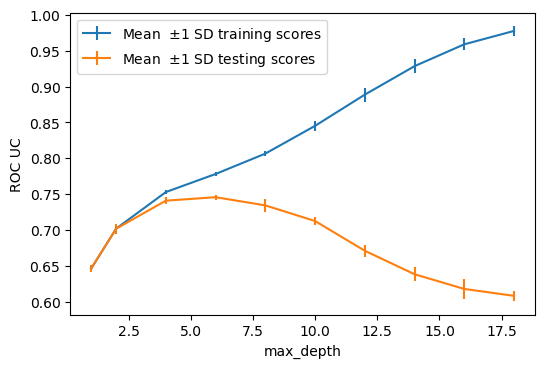

In [22]:
ax = plt.axes ()
ax.errorbar ( cv_results_df['param_max_depth'],
             cv_results_df['mean_train_score'],
             yerr=cv_results_df['std_train_score'] ,
             label="Mean  $\pm$1 SD training scores")
             

ax.errorbar ( cv_results_df['param_max_depth'],
             cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score'],
             label="Mean  $\pm$1 SD testing scores")

ax.legend()
plt.xlabel ('max_depth')
plt.ylabel ('ROC UC')

#### Apply a random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier


In [24]:
rf = RandomForestClassifier ( 
    n_estimators = 10, 
    criterion = 'gini', 
    max_depth = 3, 
    min_samples_split = 2,
    min_samples_leaf = 1 , min_weight_fraction_leaf = 0.0,
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    bootstrap = True, 
    oob_score= False, 
    n_jobs= None,
    random_state = 4, 
    verbose = 0, 
    warm_start = False, 
    class_weight = None
)

Create a parameter grid.

In [25]:
# Number of trees
rf_params_ex = { 'n_estimators': list ( range ( 10, 110, 10)) }

#rf_params_ex = { 'n_estimators': [60, 70] ,'max_depth' : [1,2] }

rf_params_ex

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [26]:
from sklearn.model_selection import GridSearchCV
cv_rf_ex = GridSearchCV ( rf, param_grid = rf_params_ex, scoring= 'roc_auc')
cv_rf_ex.cv = 5
cv_rf_ex.fit ( X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [27]:
cv_rf_ex_results_df = pd.DataFrame ( cv_rf_ex.cv_results_)

In [28]:
cv_rf_ex_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.498779,0.028436,0.024651,0.000852,10,{'n_estimators': 10},0.746594,0.745945,0.751689,0.771846,0.766402,0.756495,0.010642,10
1,0.941939,0.013194,0.038010,0.000617,20,{'n_estimators': 20},0.750097,0.753844,0.757607,0.778537,0.765789,0.761175,0.010118,9
2,1.409303,0.051483,0.054275,0.003572,30,{'n_estimators': 30},0.750020,0.756322,0.757938,0.778856,0.767580,0.762143,0.010074,7
3,2.025411,0.175693,0.071153,0.005873,40,{'n_estimators': 40},0.751988,0.753061,0.756997,0.780233,0.767922,0.762040,0.010702,8
4,2.361666,0.098477,0.079840,0.001704,50,{'n_estimators': 50},0.753248,0.755398,0.758032,0.782004,0.767485,0.763233,0.010569,1
5,2.830986,0.111170,0.092691,0.005198,60,{'n_estimators': 60},0.753124,0.755150,0.757815,0.781853,0.767627,0.763114,0.010610,2
6,3.376904,0.211197,0.109823,0.009588,70,{'n_estimators': 70},0.751764,0.754817,0.757305,0.781786,0.767301,0.762595,0.010920,5
7,3.961027,0.266881,0.131874,0.017534,80,{'n_estimators': 80},0.751515,0.754944,0.757293,0.782051,0.767650,0.762691,0.011076,3
8,4.119367,0.017271,0.137349,0.002720,90,{'n_estimators': 90},0.750878,0.754986,0.757039,0.781704,0.766812,0.762284,0.011032,6
9,4.576570,0.018646,0.145724,0.004395,100,{'n_estimators': 100},0.751308,0.755503,0.757298,0.782047,0.767213,0.762674,0.011004,4


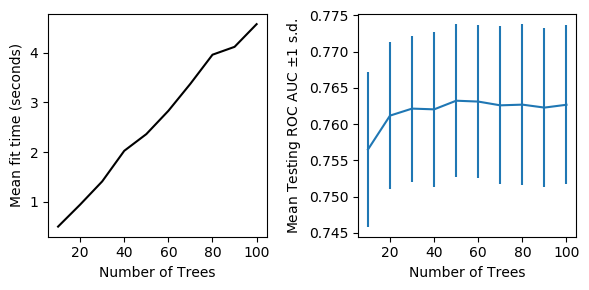

In [29]:
fig, axs = plt.subplots ( nrows=1, ncols=2, figsize= (6,3) ) 

axs[0].plot (
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_fit_time'],
    '-0'
)

axs[0].set_xlabel  ( 'Number of Trees')
axs[0].set_ylabel  ( 'Mean fit time (seconds)')

axs[1].errorbar (
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_test_score'],
    yerr=cv_rf_ex_results_df['std_test_score']
)

axs[1].set_xlabel  ( 'Number of Trees')
axs[1].set_ylabel  ( 'Mean Testing ROC AUC $\pm$1 s.d.')


plt.tight_layout()

In [30]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [31]:
df_feature_importance = pd.DataFrame (  { 'Feature name': features_response[:-1],
                                         'Importance'   : cv_rf_ex.best_estimator_.feature_importances_
                                        })

df_feature_importance.sort_values ('Importance', ascending= False)[0:10]

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


The best hyperparameter is 50 trees, what ROC AUC can be obtained on the holdout data?

In [32]:
rf.n_estimators = 50

In [33]:
rf.fit ( X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [34]:
predict_proba =  rf.predict_proba ( X_test ) 
#fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
roc_score = roc_auc_score (y_test, predict_proba[:,1])    
print (roc_score)


0.7627206206909415


### Try and fit a better random forest model by varying two parameters

In [35]:
# Number of trees
rf_params_ex = { 'n_estimators': [10,50,200],
                 'max_depth'   : [3,6,9,12] 
               }
rf_params_ex

{'n_estimators': [10, 50, 200], 'max_depth': [3, 6, 9, 12]}

In [36]:
cv_rf_ex = GridSearchCV ( rf, param_grid = rf_params_ex, 
                         scoring= 'roc_auc'
                        )
cv_rf_ex.cv = 5
cv_rf_ex.verbose = True
cv_rf_ex.fit ( X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [37]:
cv_rf_ex_results_df_2 = pd.DataFrame ( cv_rf_ex.cv_results_)

In [38]:
cv_rf_ex_results_df_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.497225,0.021502,0.025409,0.000490,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.746594,0.745945,0.751689,0.771846,0.766402,0.756495,0.010642,12
1,2.448823,0.137049,0.083361,0.009446,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.753248,0.755398,0.758032,0.782004,0.767485,0.763233,0.010569,9
2,9.263161,0.116554,0.338982,0.090537,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.751069,0.756028,0.756214,0.782581,0.768464,0.762871,0.011403,10
3,1.186993,0.466924,0.051970,0.025101,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.759909,0.759460,0.764322,0.782160,0.769147,0.767000,0.008351,8
4,5.456947,1.000760,0.155328,0.064197,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.763926,0.768048,0.768751,0.789816,0.775362,0.773181,0.009090,6


In [39]:
cv_rf_ex.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [40]:
cv_rf_ex.max_depth = 9
cv_rf_ex.n_estimators = 200
rf.fit ( X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [41]:
predict_proba =  rf.predict_proba ( X_test ) 
#fpr, tpr, thresholds =  roc_curve (y_cv_test, predict_proba[:,1])
roc_score = roc_auc_score (y_test, predict_proba[:,1])    
print (roc_score)

0.7627206206909415
